## Compartments and TADs detection

Here, we present the analysis to detect the compartments in Mouse B and iPS cells. In this example, we will use the GC-content (guanine-cytosine content) to identify which bins belong to the A or B compartments. The percentage of bases that are either guanine or cytosine on a DNA strand correlates directly with gene density and is a good measure to identify open and close chromatine.

*__Note__: Compartments are normally detected on the full genome matrix. In our examples we will just detect them on chr3*

TADbit tools uses the `tadbit segment` tool to identify both compartments and TADs.

### Compartments

The identification of compartments is conducted in the normalized matrix at a resolution of around 100kb.  
We will compute the normalization biases for the target resolution 100kb and identify the compartments.

#### Mouse PSC cells

In [2]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization Vanilla \
    --resolution 100000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2021-09-08 19:46:18]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2021-09-08 19:46:32]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2021-09-08 19:46:33]
      -> too few interactions defined as less than       100 interactions
      -> removed 32 columns (31/32 null/high counts) of 1598 (2.0%)
  - Rescaling sum of interactions per bins                                     [2021-09-08 19:46:33]
  - Vanilla normalization                                                      [2021-09-08 19:46:33]
  - Getting sum of normalized bins                                             

For the identification of the compartments we will use the TADbit `segment tool` with the `only_compartments` flag. The fasta file of the mus musculus reference genome will be used to determine whether the divisions of the principal component correspond to an A or B compartment. TADbit uses the fasta file to compute the GC ratio and associate the regions with higher ratios to A compartments. 

In [3]:
%%bash

tadbit segment -w ../results/PSC_rep1/ --only_compartments \
    --resolution 100000 -C 12 \
    --fasta ../refGenome/mm39_chr3.fa \
    --chromosomes chr3

loading ../results/PSC_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 100kb

  (Matrix size 1598x1598)                                                      [2021-09-08 19:47:02]

  - Parsing BAM (100 chunks)                                                   [2021-09-08 19:47:02]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2021-09-08 19:47:04]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching compartments
  - Computing GC content to label compartments
Loading cached genome
Processing chromosome chr3
  - Spearman correlation between "rich in A" and Eigenvector:
      rho: -0.7868389 p-val:0.0000000
,-------.
| PATHs |
,----.-------.---------------------------------------------------------

Results are stored in the `06_segmentation/compartments_100kb` subfolder. They include a text file in Tab-separated Values (tsv) format with the description of the compartments and the image of the  correlation matrix used for the identification of the borders for each processed chromosome.

In [4]:
%%bash

ls ../results/PSC_rep1/06_segmentation/compartments_100kb/

chr3_d911b662f2.tsv
chr3_EigVect1_d911b662f2.tsv
chr3_EV1_d911b662f2.png


In [5]:
%%bash

cat ../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_d911b662f2.tsv

#	start	end	rich in A	type
chr3	31	80	0.39	B
chr3	81	81	nan	A
chr3	82	83	0.78	B
chr3	84	84	nan	A
chr3	85	85	nan	B
chr3	86	105	0.46	A
chr3	106	146	0.39	B
chr3	147	147	nan	A
chr3	148	150	0.60	B
chr3	151	153	0.59	A
chr3	154	162	0.44	B
chr3	163	163	nan	A
chr3	164	192	0.40	B
chr3	193	194	0.83	A
chr3	195	195	nan	B
chr3	196	196	nan	A
chr3	197	201	0.51	B
chr3	202	202	nan	A
chr3	203	215	0.42	B
chr3	216	216	nan	A
chr3	217	218	0.82	B
chr3	219	223	0.52	A
chr3	224	271	0.39	B
chr3	272	290	0.46	A
chr3	291	303	0.43	B
chr3	304	312	0.48	A
chr3	313	320	0.48	B
chr3	321	322	0.86	A
chr3	323	323	nan	B
chr3	324	331	0.50	A
chr3	332	338	0.47	B
chr3	339	363	0.44	A
chr3	364	364	nan	B
chr3	365	367	0.64	A
chr3	368	369	0.85	B
chr3	370	371	0.75	A
chr3	372	373	0.83	B
chr3	374	379	0.51	A
chr3	380	385	0.51	B
chr3	386	386	nan	A
chr3	387	405	0.43	B
chr3	406	417	0.46	A
chr3	418	509	0.38	B
chr3	510	536	0.46	A
chr3	537	537	nan	B
chr3	538	538	nan	A
chr3	539	545	0.47	B
chr3	546	552	0.51	A
chr3	553	553	nan	B
chr3	554	554	nan	A


![chr3 correlation matrix 100Kb](../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EV1_d911b662f2.png)

#### Mouse B cells

In [1]:
%%bash

tadbit normalize -w ../results/B_rep1/ --normalization Vanilla \
    --resolution 100000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2021-09-15 13:22:20]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2021-09-15 13:22:22]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2021-09-15 13:22:23]
      -> too few interactions defined as less than       100 interactions
      -> removed 31 columns (31/31 null/high counts) of 1598 (1.9%)
  - Rescaling sum of interactions per bins                                     [2021-09-15 13:22:23]
  - Vanilla normalization                                                      [2021-09-15 13:22:23]
  - Getting sum of normalized bins                                             

In [2]:
%%bash

tadbit segment -w ../results/B_rep1/ --only_compartments \
    --resolution 100000 -C 12 \
    --fasta ../refGenome/mm39_chr3.fa \
    --chromosomes chr3

loading ../results/B_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 100kb

  (Matrix size 1598x1598)                                                      [2021-09-15 13:23:02]

  - Parsing BAM (100 chunks)                                                   [2021-09-15 13:23:02]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2021-09-15 13:23:05]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching compartments
  - Computing GC content to label compartments
Loading cached genome
Processing chromosome chr3
  - Spearman correlation between "rich in A" and Eigenvector:
      rho: -0.6704794 p-val:0.0000000
,-------.
| PATHs |
,----.-------.-----------------------------------------------------------

In [3]:
%%bash

ls ../results/B_rep1/06_segmentation/compartments_100kb/

chr3_d911b662f2.tsv
chr3_EigVect1_d911b662f2.tsv
chr3_EV1_d911b662f2.png


In [4]:
%%bash

cat ../results/B_rep1/06_segmentation/compartments_100kb/chr3_d911b662f2.tsv

#	start	end	rich in A	type
chr3	31	87	0.39	B
chr3	88	105	0.47	A
chr3	106	146	0.39	B
chr3	147	153	0.46	A
chr3	154	162	0.44	B
chr3	163	163	nan	A
chr3	164	192	0.40	B
chr3	193	195	0.62	A
chr3	196	200	0.51	B
chr3	201	202	0.80	A
chr3	203	218	0.42	B
chr3	219	223	0.52	A
chr3	224	271	0.39	B
chr3	272	278	0.52	A
chr3	279	306	0.43	B
chr3	307	307	nan	A
chr3	308	308	nan	B
chr3	309	312	0.57	A
chr3	313	324	0.46	B
chr3	325	328	0.59	A
chr3	329	357	0.44	B
chr3	358	362	0.51	A
chr3	363	365	0.63	B
chr3	366	383	0.44	A
chr3	384	385	0.85	B
chr3	386	386	nan	A
chr3	387	406	0.43	B
chr3	407	411	0.52	A
chr3	412	412	nan	B
chr3	413	417	0.54	A
chr3	418	511	0.38	B
chr3	512	543	0.45	A
chr3	544	544	nan	B
chr3	545	547	0.64	A
chr3	548	575	0.42	B
chr3	576	578	0.60	A
chr3	579	583	0.52	B
chr3	584	587	0.55	A
chr3	588	589	0.84	B
chr3	590	594	0.51	A
chr3	595	595	nan	B
chr3	596	597	0.78	A
chr3	598	598	nan	B
chr3	599	607	0.43	A
chr3	608	612	0.49	B
chr3	613	613	nan	A
chr3	614	638	0.41	B
chr3	639	639	nan	A
chr3	640	652	0.43	B
chr3	6

![chr3 correlation matrix 100Kb](../results/B_rep1/06_segmentation/compartments_100kb/chr3_EV1_d911b662f2.png)

### Compare

As part of the results we also have a file with the coordinates of each computed eigenvector:

In the first column, the coordinates correspond to the assignment of the A and B compartments, positive values for A compartments and negative values for B compartments.

In [5]:
%%bash

head ../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv -n 50

# EV_1 (108.8097)	EV_2 (27.9290)	EV_3 (16.3873)
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
-0.021511267597536098	0.0011017584752534416	-0.0031005610406844063
-0.024284580746112915	-0.010188089844677742	-0.007053945852833506
-0.02596346874118482	-0.0017173148770163707	0.014089324823154824
-0.022961214253605075	-0.016351339739886717	-0.004952066607638986
-0.017431715544667065	0.0028558933083484847	-0.004532364948497674
-0.02200111582722491	-0.008541702453223733	0.013646324053661174
-0.02206776177871179	0.0013341100029697903	-0.0027502532355311088
-0.015471415467221568	-0.004744328944405021	-0.004235782027194725
-0.022895985710371162	-0.005268326960730906	-0.003503997778606491


In [6]:
%%bash

head ../results/B_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv -n 50

# EV_1 (255.4424)	EV_2 (48.3013)	EV_3 (26.1112)
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
-0.02469637292174219	-0.008200818076742332	-0.0027666612563348424
-0.01154094585123432	-0.0032119232649418456	-0.01905556669304481
-0.03265811249859443	0.0007680398169915395	-0.03680293228751877
-0.01945778738043126	0.0032272317393915975	-0.020473541725690315
-0.0318367223027212	0.005726011185724947	-0.03076815011662174
-0.033141984692174754	0.004938731463809846	-0.03938818618608523
-0.034726939748063096	0.004847005126235667	-0.039344069624721256
-0.03357815709246515	0.0038201686100771204	-0.03667778223641329
-0.03160895800986441	0.009626780481852767	-0.04264657675764894
-0.02187139720

We are going to compare the eigevector values for PSC and B cells with some python code:

In [7]:
from builtins   import next

fh = open('../results/B_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv')

header = next(fh)

ev1_B = []
for line in fh:
    evc1, evc2, evc3 = line.split()
    ev1_B.append(float(evc1))
    
fh = open('../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv')

header = next(fh)

ev1_PSC = []
for line in fh:
    evc1, evc2, evc3 = line.split()
    ev1_PSC.append(float(evc1))
    
diff = []
for i in range(len(ev1_B)):
    diff.append(ev1_B[i] - ev1_PSC[i])

### Spot changes in activity

Plot the difference between each eigenvector along the chromosome 3

In [8]:
from matplotlib import pyplot as plt

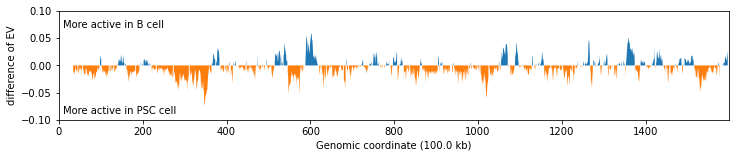

In [9]:
reso = 100000
plt.figure(figsize=(12, 2))
plt.text(10, 0.07, 'More active in B cell')
plt.fill_between(range(len(diff)), diff, 0, where=[i>0 for i in diff])
plt.text(10, -0.09, 'More active in PSC cell')
plt.fill_between(range(len(diff)), diff, 0, where=[i<0 for i in diff])
plt.xlim(0, len(diff))
plt.ylim(-0.1, 0.1)
plt.ylabel('difference of EV')
_ = plt.xlabel('Genomic coordinate (%s kb)' % (reso / 1000))

### Correlate eigenvectors

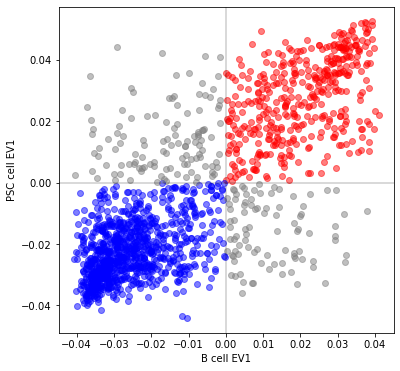

In [10]:
plt.figure(figsize=(6, 6))
for i in range(len(ev1_B)):
    if ev1_B[i] > 0 and ev1_PSC[i] > 0:
        plt.plot(ev1_B[i], ev1_PSC[i], 'ro', alpha=0.5)
    elif ev1_B[i] < 0 and ev1_PSC[i] < 0:
        plt.plot(ev1_B[i], ev1_PSC[i], 'bo', alpha=0.5)
    else:
        plt.plot(ev1_B[i], ev1_PSC[i], 'o', color='grey', alpha=0.5)
plt.axhline(0, color='k', alpha=0.2)
plt.axvline(0, color='k', alpha=0.2)
plt.xlabel('B cell EV1')
_ = plt.ylabel('PSC cell EV1')

### TADs

Now, we move to the TADs detection. In this notebook we will detect TAD borders in chromosome 3 at 50kbp resolution.
We use `tadbit segment`with the `--only_tads` flag. The tool will call internally the detection algorithm named also TADbit. The TADbit algorithm is a breakpoint detection algorithm that returns the optimal segmentation of the chromosome under BIC-penalized likelihood. The model assumes that counts have a Poisson distribution and that the expected value of the counts decreases like a power-law with the linear distance on the chromosome.

#### Mouse B cells

In [11]:
%%bash

tadbit normalize -w ../results/B_rep1/ --normalization Vanilla \
    --resolution 50000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2021-09-15 13:24:14]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2021-09-15 13:24:16]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2021-09-15 13:24:17]
      -> too few interactions defined as less than       100 interactions
      -> removed 64 columns (62/64 null/high counts) of 3195 (2.0%)
  - Rescaling sum of interactions per bins                                     [2021-09-15 13:24:17]
  - Vanilla normalization                                                      [2021-09-15 13:24:17]
  - Getting sum of normalized bins                                             

In [12]:
%%bash

tadbit segment -w ../results/B_rep1/ --only_tads \
    -r 50000 -C 12 \
    --chromosomes chr3

loading ../results/B_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 50kb

  (Matrix size 3195x3195)                                                      [2021-09-15 13:24:22]

  - Parsing BAM (100 chunks)                                                   [2021-09-15 13:24:22]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2021-09-15 13:24:24]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching TADs
  - chr3
,-------.
| PATHs |
,----.-------.--------------------------------------------------------------------------------.--------------.
| Id | JOBid |                                                                           Path |         Type |
|----+-------+---------------------------------

Results are stored in the `06_segmentation/tads_50kb` subfolder. They include a text file in Tab-separated Values (tsv) format with the description of the TADs for each processed chromosome.

In [3]:
%%bash

ls ../results/B_rep1/06_segmentation/tads_50kb/

In [14]:
%%bash

cat ../results/B_rep1/06_segmentation/tads_50kb/chr3_e0b2edc568.tsv

#	start	end	score	density
1	1	64	3.0	0.009
2	65	70	4.0	1.03
3	71	90	3.0	0.974
4	91	108	4.0	0.952
5	109	113	3.0	1.137
6	114	147	9.0	0.986
7	148	158	4.0	0.79
8	159	163	6.0	1.145
9	164	172	6.0	0.837
10	173	179	9.0	1.047
11	180	209	10.0	1.499
12	210	283	2.0	1.085
13	284	288	4.0	1.021
14	289	326	6.0	1.272
15	327	331	5.0	0.697
16	332	356	3.0	0.989
17	357	361	3.0	0.724
18	362	384	10.0	1.069
19	385	406	5.0	1.065
20	407	412	10.0	0.914
21	413	441	9.0	1.091
22	442	447	6.0	1.079
23	448	537	9.0	1.099
24	538	542	10.0	0.786
25	543	578	8.0	1.07
26	579	583	8.0	0.615
27	584	612	9.0	0.911
28	613	625	7.0	1.231
29	626	630	5.0	0.917
30	631	636	4.0	0.68
31	637	642	3.0	0.816
32	643	647	10.0	0.85
33	648	656	9.0	1.236
34	657	714	10.0	0.92
35	715	723	5.0	1.432
36	724	732	8.0	0.952
37	733	749	7.0	1.261
38	750	766	10.0	1.557
39	767	779	9.0	1.038
40	780	811	10.0	0.959
41	812	837	10.0	1.067
42	838	1022	7.0	1.075
43	1023	1027	4.0	1.455
44	1028	1043	4.0	1.689
45	1044	1057	4.0	1.933
46	1058	1068	10.0	1.448
47	1069	1094

The main output of the tool is a text file with the information of each identified TAD. The file contains: the starting and ending bins in the matrix, a score from 1 to 10 of the statistical robustness or confidence of the boundary and the density. The density is the relative amount of interactions in this TAD. If this relative amount of interactions is higher than 1 the number of interactions inside the TAD is higher than expected according to its size.

We can plot the TADs in the region of chromosome 3 that contains the Sox2 locus (chr3:33950000-35450000) using the `tadbit bin` tool and the `--tad_def` option.

In [2]:
%%bash

tadbit bin -w ../results/B_rep1/ --only_plot \
    -c chr3:35000000-41000000 --resolution 50000  \
    --cmap Reds --format png \
    --norm raw \
    --triangular \
    --tad_def ../results/B_rep1/06_segmentation/tads_50kb/chr3_e0b2edc568.tsv


Extraction of chr3:35000000-41000000
Getting raw matrices                                                           [2021-09-20 13:20:09]

  (Matrix size 120x120)                                                        [2021-09-20 13:20:09]

  - Parsing BAM (60 chunks)                                                    [2021-09-20 13:20:09]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

  - Getting matrices                                                           [2021-09-20 13:20:10]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

 - Plotting: raw                                                               [2021-09-20 13:20:10]


Traceback (most recent call last):
  File "/home/dcastillo/miniconda2/envs/py3_tadbit/lib/python3.7/site-packages/pytadbit/tools/tadbit_bin.py", line 745, in load_tads_fromdb
    tad_job_id = int(opts.tad_def)
ValueError: invalid literal for int() with base 10: '../results/B_rep1/06_segmentation/tads_50kb/chr3_e0b2edc568.tsv'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dcastillo/miniconda2/envs/py3_tadbit/bin/tadbit", line 170, in <module>
    main(sys.argv)
  File "/home/dcastillo/miniconda2/envs/py3_tadbit/bin/tadbit", line 167, in main
    args.func(args)
  File "/home/dcastillo/miniconda2/envs/py3_tadbit/lib/python3.7/site-packages/pytadbit/tools/tadbit_bin.py", line 273, in run
    tads = load_tads_fromdb(opts)
  File "/home/dcastillo/miniconda2/envs/py3_tadbit/lib/python3.7/site-packages/pytadbit/tools/tadbit_bin.py", line 777, in load_tads_fromdb
    tads, _ = parse_tads(opts.tad_def)
  File "/home/dcasti

CalledProcessError: Command 'b'\ntadbit bin -w ../results/B_rep1/ --only_plot \\\n    -c chr3:35000000-41000000 --resolution 50000  \\\n    --cmap Reds --format png \\\n    --norm raw \\\n    --triangular \\\n    --tad_def ../results/B_rep1/06_segmentation/tads_50kb/chr3_e0b2edc568.tsv\n'' returned non-zero exit status 1.

In [1]:
%%bash

ls ../results/B_rep1/05_sub-matrices/

norm_chr3:200-1400_25kb_ef84c4f46b.mat
nrm_chr3:200-1400_25kb_c60c38c4ba.mcool
nrm_chr3:200-1400_25kb_e27f56a81e.png
nrm_chr3:3395-3545_10kb_5927cd6f7a_tri.png
nrm_chr3:3395-3545_10kb_66803e4ebd.abc
raw_chr3:200-1400_25kb_c60c38c4ba.mcool


![chr3 tads 50Kb](../results/B_rep1/05_sub-matrices/nrm_chr3:3395-3545_10kb_5927cd6f7a_tri.png)

#### Mouse PSC cells

In [47]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization Vanilla \
    --resolution 50000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2021-09-09 12:55:31]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2021-09-09 12:55:39]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2021-09-09 12:55:40]
      -> too few interactions defined as less than       100 interactions
      -> removed 65 columns (63/65 null/high counts) of 3195 (2.0%)
  - Rescaling sum of interactions per bins                                     [2021-09-09 12:55:40]
  - Vanilla normalization                                                      [2021-09-09 12:55:40]
  - Getting sum of normalized bins                                             

In [48]:
%%bash

tadbit segment -w ../results/PSC_rep1/ --only_tads \
    -r 50000 -C 12 \
    --chromosomes chr3

loading ../results/PSC_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 50kb

  (Matrix size 3195x3195)                                                      [2021-09-09 12:55:49]

  - Parsing BAM (100 chunks)                                                   [2021-09-09 12:55:49]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2021-09-09 12:55:51]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching TADs
  - chr3
,-------.
| PATHs |
,----.-------.--------------------------------------------------------------------------------.-----------------.
| Id | JOBid |                                                                           Path |            Type |
|----+-------+-------------------------

In [49]:
%%bash

ls ../results/PSC_rep1/06_segmentation/tads_50kb/

chr3_e0b2edc568.tsv


In [50]:
%%bash

tadbit bin -w ../results/PSC_rep1/ --only_plot \
    -c chr3:35000000-41000000 --resolution 50000  \
    --cmap Reds --format png \
    --norm raw \
    --triangular \
    --tad_def ../results/PSC_rep1/06_segmentation/tads_50kb/chr3_e0b2edc568.tsv


Extraction of chr3:35000000-41000000
Getting raw matrices                                                           [2021-09-09 13:03:48]

  (Matrix size 120x120)                                                        [2021-09-09 13:03:48]

  - Parsing BAM (60 chunks)                                                    [2021-09-09 13:03:48]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

  - Getting matrices                                                           [2021-09-09 13:03:48]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

 - Plotting: raw                                                               [2021-09-09 13:03:49]
Cleaning                                                                       [2021-09-09 13:03:49]
Saving to DB                                                        

In [52]:
%%bash

ls ../results/PSC_rep1/05_sub-matrices/

nrm_chr3:3395-3545_10kb_bab7be0e72.png
nrm_chr3:3395-3545_10kb_bbc3ec05c6.png
nrm_chr3:3395-3545_10kb_c8e49087d1.png
nrm_chr3:3395-3545_10kb_e89b5aa69f.png
raw_chr3:3395-3545_10kb_bab7be0e72.png
raw_chr3_50kb_2ffc540133.abc
raw_chr3_50kb_2ffc540133.png
raw_chr3:700-820_50kb_556ee50555_tri.png


![chr3 tads 50Kb](../results/PSC_rep1/05_sub-matrices/raw_chr3:700-820_50kb_556ee50555_tri.png)